## FIRST ATTEMPT TO CNN

In this first file , I will complete the first banch of points requested by the project. In particular, the main goal is to build a shallow convolutional neural network able to classify images from 15 different classes with a test accuracy of at least 30%.

Before doing so, I have to preprocesso my data. Indeed what I have is a group of black and white images of 15 different categories, split in train set and in test set. I wrote 2 functions (saved in another script file called utils) in which I collect all the images's directories and I save all of them as numpy matrices (Morevore I performed a resize of each images in order to have a (64,64,1)-dimension images).

The details of these functions are described in the presentation and in the script file dedicated to them.


In [1]:
#IN this cell I simply upload the packages I used to build the cnn or to do some other operation (read directorie, plot something, do mathematical operation etc...) 
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import os
import cv2
from keras import initializers
from keras import optimizers
from keras.utils import to_categorical #to create dummy variable
from keras.layers import Conv2D,Flatten,Dropout, MaxPooling2D
from keras.callbacks import EarlyStopping
from keras.callbacks import History
from sklearn.metrics import confusion_matrix


# In this part I simply importe the other script file I wrote in which there are some useful function to process data
import import_ipynb
import utils

Using TensorFlow backend.


importing Jupyter notebook from utils.ipynb


## PREPROCESSING DEI  DATI 

In the following cells I simply construct and prepare my data in order to make them feasible for my cnn.


In [2]:
# SOME IMPORTANT GLOBAL VARIABLE
base_dir = '../images/'
train_dir=os.path.join(base_dir,'train/')
test_dir=os.path.join(base_dir,'test/')
labels = ["Bedroom","Coast","Forest","HighWay","Industrial","InsideCity","Kitchen","LivingRoom","Mountain","Office","OpenCountry","Store","Street","Suburb","TallBuilding"]





In [3]:
# preparing my train data
#what I obtain at the end of there 2 functions is a 3-dimensional numpy-ndarray in which there are saved 1500 normalized 
# images of dimension 64x64, with their respective labels. Morevore I shuffle the images in order not to have 
#the initial order (this is necessary when I split data in train set and validation set).
list_of_images = utils.list_of_path(labels,train_dir)
train_data,train_labels= utils.read_and_process_images(list_of_images)




In [4]:
# I do the same as the previous cell for creating test set

list_of_images_test = utils.list_of_path(labels,test_dir)
test_data,test_labels = utils.read_and_process_images(list_of_images_test)

In [5]:
# In this cell I reshape my data. In particular I add a dimension at the end in order to express the number of channel 
# of each image. It is necessary, otherwise I would have an error when I train the cnn. 
train_data = train_data.reshape(train_data.shape[0],train_data.shape[1],train_data.shape[2],1)
test_data = test_data.reshape(test_data.shape[0],test_data.shape[1],test_data.shape[2],1)

In [6]:
train_labels_dummy = to_categorical(train_labels,15)
test_labels_dummy = to_categorical(test_labels,15)

## DEFINITION OF THE MODEL 

in order to define the cnn I wrote this first function.

-It does'n receive anything in the input because it simply implements the first cnn that the projects requests, with no intention of trying to improve results. Going ahead with the project, I will try to modify the structure of this cnn in order to achieve better results

In [7]:

def first_cnn():
    """
    This function represents the first convolutional neural network requested tothe projects
    It doesn't receive any input.
    As optimizer it uses stochastic gradient descend with nesterov momentum and it is formed by 3 convolutional layer 
    plus a dense layer with relu as activation function
    At the end there is softmax, as we are dealing with classification problem
    
    The output is the not trained model 
    """
    np.random.seed(9)
    sgd = optimizers.SGD(momentum=0.9,nesterov=True)
    norm = initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None)
    model = Sequential()
    #first convolutional layer
    model.add(Conv2D(filters=8,kernel_size=3,padding = 'valid',activation='relu',input_shape=(64,64,1)))
    model.add(MaxPooling2D(pool_size=2,strides=2))

    #secondo convolutional layer
    model.add(Conv2D(filters=16,kernel_size=3,strides=2,padding='valid',activation='relu',input_shape=(64,64,1)))
    model.add(MaxPooling2D(pool_size=2,strides=2))

    #third convolutional layer
    model.add(Conv2D(filters=32,kernel_size=3,padding='valid',activation='relu',input_shape=(64,64,1)))
    model.add(Flatten())
    model.add(Dense(15,activation='relu',kernel_initializer=norm,bias_initializer='zeros'))
    model.add(Dense(15,activation='softmax'))

    #classification output
    model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics = ['accuracy'])
    return model



# MODEL TRAINING AND TESTING

In [17]:
# IN THIS CELL I TRAIN MY CNN.
#To do so, I first define history (in order to collect values of accuracy and loss) and earlystopping in order to stop 
# the training before the end of epochs if it is necessary.


history = History()
earlyStopping = EarlyStopping(min_delta=0.10,patience = 10)

model = first_cnn()

model.fit(train_data,train_labels_dummy,batch_size=32,epochs=100,validation_split=0.15,shuffle=True,callbacks=[earlyStopping,history])


Train on 1275 samples, validate on 225 samples
Epoch 1/100
1275/1275 [==============================] - 1s 870us/step - loss: 2.7095 - accuracy: 0.0596 - val_loss: 2.7091 - val_accuracy: 0.0400
Epoch 2/100
1275/1275 [==============================] - 1s 782us/step - loss: 2.7083 - accuracy: 0.0722 - val_loss: 2.7101 - val_accuracy: 0.0578
Epoch 3/100
1275/1275 [==============================] - 1s 762us/step - loss: 2.7068 - accuracy: 0.0761 - val_loss: 2.7093 - val_accuracy: 0.0844
Epoch 4/100
1275/1275 [==============================] - 1s 767us/step - loss: 2.7044 - accuracy: 0.0855 - val_loss: 2.7068 - val_accuracy: 0.0711
Epoch 5/100
1275/1275 [==============================] - 1s 778us/step - loss: 2.7005 - accuracy: 0.0714 - val_loss: 2.6993 - val_accuracy: 0.0889
Epoch 6/100
1275/1275 [==============================] - 1s 775us/step - loss: 2.6888 - accuracy: 0.0980 - val_loss: 2.6768 - val_accuracy: 0.0756
Epoch 7/100
1275/1275 [==============================] - 1s 761us/step 

In [18]:
# I evaluate my model
model.evaluate(test_data,test_labels_dummy)

2985/2985 [==============================] - 1s 313us/step


[2.1373846978997464, 0.35979899764060974]

In [19]:
# I predict classes of my test_data in order to build my confusion matrix 
y_pred = model.predict_classes(test_data)

In [20]:
#obtaining the confusion matrix
cm = confusion_matrix(test_labels,y_pred)

# PLOTTING 

In the remaining cells I perform some plots that can be interested to comment

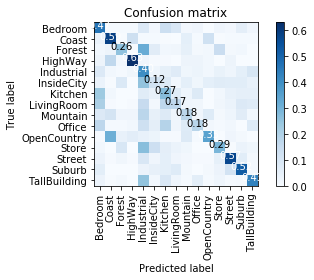

In [21]:

utils.plot_confusion_matrix(cm,labels,"point_one","images_point_one/",normalize=True)


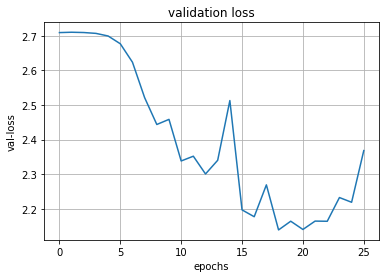

In [22]:
plt.title("validation loss")
plt.xlabel("epochs")
plt.ylabel("val-loss")
plt.plot(history.history['val_loss'])
plt.grid()
plt.savefig("images_point_one/validation_loss.jpg")


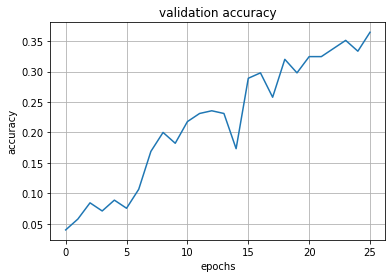

In [23]:

plt.title("validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.savefig("images_point_one/validation_accuracy.jpg")


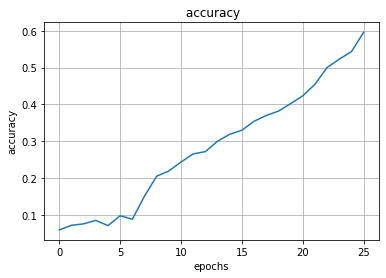

In [24]:
plt.title(" accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(history.history['accuracy'])
plt.grid()
plt.savefig("images_point_one/accuracy.jpg")

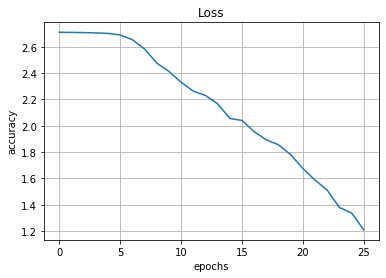

In [25]:
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.plot(history.history['loss'])
plt.grid()
plt.savefig("images_point_one/loss.jpg")

## SECOND PHASE -->TRY TO IMPROVE MY RESULTS

Now, whit this cnn, I reach a test accuracy of ~35%, but I would like to improve this results. In the next script, called "second_point", I will exploit some characteristics and features of the cnn to try to get a test accuracy of at least 60%